# Importando Bibliotecas



In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from collections import Counter

sns.set_theme(style="whitegrid")

# Carregando Dados

In [2]:
df = pd.read_csv("/opt/tljh/hub/share/datasets/Electronic_sales_Sep2023-Sep2024.csv")

In [3]:
df.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


# Tratando Dados

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

In [5]:
colunas_pt = {
    'Customer ID': 'ID Cliente',
    'Age': 'Idade',
    'Gender': 'Gênero',
    'Loyalty Member': 'Membro Fidelidade',
    'Product Type': 'Tipo Produto',
    'SKU': 'Código SKU',
    'Rating': 'Avaliação',
    'Order Status': 'Status Pedido',
    'Payment Method': 'Método Pagamento',
    'Total Price': 'Preço Total',
    'Unit Price': 'Preço Unitário',
    'Quantity': 'Quantidade',
    'Purchase Date': 'Data Compra',
    'Shipping Type': 'Tipo Entrega',
    'Add-ons Purchased': 'Complementos Comprados',
    'Add-on Total': 'Total Complementos'
}

df = df.rename(columns=colunas_pt)

print(df.columns)

Index(['ID Cliente', 'Idade', 'Gênero', 'Membro Fidelidade', 'Tipo Produto',
       'Código SKU', 'Avaliação', 'Status Pedido', 'Método Pagamento',
       'Preço Total', 'Preço Unitário', 'Quantidade', 'Data Compra',
       'Tipo Entrega', 'Complementos Comprados', 'Total Complementos'],
      dtype='object')


In [6]:
df.nunique()

ID Cliente                12136
Idade                        63
Gênero                        2
Membro Fidelidade             2
Tipo Produto                  5
Código SKU                   10
Avaliação                     5
Status Pedido                 2
Método Pagamento              6
Preço Total                 104
Preço Unitário               14
Quantidade                   10
Data Compra                 366
Tipo Entrega                  5
Complementos Comprados       75
Total Complementos        10036
dtype: int64

In [7]:
df.insert(0, 'ID Venda', range(1, len(df) + 1))

In [8]:
valores_unicos = df['Método Pagamento'].unique()

valores_unicos

array(['Credit Card', 'Paypal', 'Cash', 'Debit Card', 'Bank Transfer',
       'PayPal'], dtype=object)

In [9]:
df['Método Pagamento'] = df['Método Pagamento'].replace('Paypal', 'PayPal')

In [10]:
valores_unicos = df['Método Pagamento'].unique()

valores_unicos

array(['Credit Card', 'PayPal', 'Cash', 'Debit Card', 'Bank Transfer'],
      dtype=object)

In [11]:
df.head()

,ID Venda,ID Cliente,Idade,Gênero,Membro Fidelidade,Tipo Produto,Código SKU,Avaliação,Status Pedido,Método Pagamento,Preço Total,Preço Unitário,Quantidade,Data Compra,Tipo Entrega,Complementos Comprados,Total Complementos
0,1,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,2,1000,53,Male,No,Tablet,SKU1002,3,Completed,PayPal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,3,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,4,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,5,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [12]:
tipos_entrega_unicos = df['Tipo Entrega'].unique()

tipos_entrega_unicos

array(['Standard', 'Overnight', 'Express', 'Same Day', 'Expedited'],
      dtype=object)

In [13]:
traduzir_genero = {
    'Male': 'Masculino',
    'Female': 'Feminino'
}

traduzir_membro = {
    'Yes': 'Sim',
    'No': 'Não'
}

traduzir_tipo_produto = {
    'Headphones': 'Fones de Ouvido',
    'Laptop': 'Notebook'
}

traduzir_status_pedido = {
    'Completed': 'Completo',
    'Cancelled': 'Cancelado'
}

traduzir_metodo_pagamento = {
    'Credit Card': 'Cartão de Crédito',
    'Debit Card': 'Cartão de Débito',
    'Bank Transfer': 'Transferência Bancária',
    'Cash': 'Dinheiro'
}

traduzir_tipo_entrega = {
    'Standard': 'Padrão',
    'Overnight': 'Noite para o Dia',
    'Express': 'Expresso',
    'Same Day': 'No Mesmo Dia',
    'Expedited': 'Acelerado'
}

In [14]:
df['Gênero'] = df['Gênero'].replace(traduzir_genero)
df['Membro Fidelidade'] = df['Membro Fidelidade'].replace(traduzir_membro)
df['Tipo Produto'] = df['Tipo Produto'].replace(traduzir_tipo_produto)
df['Status Pedido'] = df['Status Pedido'].replace(traduzir_status_pedido)
df['Método Pagamento'] = df['Método Pagamento'].replace(traduzir_metodo_pagamento)
df['Tipo Entrega'] = df['Tipo Entrega'].replace(traduzir_tipo_entrega)

df.head()

,ID Venda,ID Cliente,Idade,Gênero,Membro Fidelidade,Tipo Produto,Código SKU,Avaliação,Status Pedido,Método Pagamento,Preço Total,Preço Unitário,Quantidade,Data Compra,Tipo Entrega,Complementos Comprados,Total Complementos
0,1,1000,53,Masculino,Não,Smartphone,SKU1004,2,Cancelado,Cartão de Crédito,5538.33,791.19,7,2024-03-20,Padrão,"Accessory,Accessory,Accessory",40.21
1,2,1000,53,Masculino,Não,Tablet,SKU1002,3,Completo,PayPal,741.09,247.03,3,2024-04-20,Noite para o Dia,Impulse Item,26.09
2,3,1002,41,Masculino,Não,Notebook,SKU1005,3,Completo,Cartão de Crédito,1855.84,463.96,4,2023-10-17,Expresso,NaN,0.00
3,4,1002,41,Masculino,Sim,Smartphone,SKU1004,2,Completo,Dinheiro,3164.76,791.19,4,2024-08-09,Noite para o Dia,"Impulse Item,Impulse Item",60.16
4,5,1003,75,Masculino,Sim,Smartphone,SKU1001,5,Completo,Dinheiro,41.50,20.75,2,2024-05-21,Expresso,Accessory,35.56


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID Venda                20000 non-null  int64  
 1   ID Cliente              20000 non-null  int64  
 2   Idade                   20000 non-null  int64  
 3   Gênero                  19999 non-null  object 
 4   Membro Fidelidade       20000 non-null  object 
 5   Tipo Produto            20000 non-null  object 
 6   Código SKU              20000 non-null  object 
 7   Avaliação               20000 non-null  int64  
 8   Status Pedido           20000 non-null  object 
 9   Método Pagamento        20000 non-null  object 
 10  Preço Total             20000 non-null  float64
 11  Preço Unitário          20000 non-null  float64
 12  Quantidade              20000 non-null  int64  
 13  Data Compra             20000 non-null  object 
 14  Tipo Entrega            20000 non-null

In [16]:
df['Complementos Comprados'] = df['Complementos Comprados'].fillna(value='Nenhum')
df.head()

,ID Venda,ID Cliente,Idade,Gênero,Membro Fidelidade,Tipo Produto,Código SKU,Avaliação,Status Pedido,Método Pagamento,Preço Total,Preço Unitário,Quantidade,Data Compra,Tipo Entrega,Complementos Comprados,Total Complementos
0,1,1000,53,Masculino,Não,Smartphone,SKU1004,2,Cancelado,Cartão de Crédito,5538.33,791.19,7,2024-03-20,Padrão,"Accessory,Accessory,Accessory",40.21
1,2,1000,53,Masculino,Não,Tablet,SKU1002,3,Completo,PayPal,741.09,247.03,3,2024-04-20,Noite para o Dia,Impulse Item,26.09
2,3,1002,41,Masculino,Não,Notebook,SKU1005,3,Completo,Cartão de Crédito,1855.84,463.96,4,2023-10-17,Expresso,Nenhum,0.00
3,4,1002,41,Masculino,Sim,Smartphone,SKU1004,2,Completo,Dinheiro,3164.76,791.19,4,2024-08-09,Noite para o Dia,"Impulse Item,Impulse Item",60.16
4,5,1003,75,Masculino,Sim,Smartphone,SKU1001,5,Completo,Dinheiro,41.50,20.75,2,2024-05-21,Expresso,Accessory,35.56


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID Venda                20000 non-null  int64  
 1   ID Cliente              20000 non-null  int64  
 2   Idade                   20000 non-null  int64  
 3   Gênero                  19999 non-null  object 
 4   Membro Fidelidade       20000 non-null  object 
 5   Tipo Produto            20000 non-null  object 
 6   Código SKU              20000 non-null  object 
 7   Avaliação               20000 non-null  int64  
 8   Status Pedido           20000 non-null  object 
 9   Método Pagamento        20000 non-null  object 
 10  Preço Total             20000 non-null  float64
 11  Preço Unitário          20000 non-null  float64
 12  Quantidade              20000 non-null  int64  
 13  Data Compra             20000 non-null  object 
 14  Tipo Entrega            20000 non-null

In [18]:
df.isna().nunique()

ID Venda                  1
ID Cliente                1
Idade                     1
Gênero                    2
Membro Fidelidade         1
Tipo Produto              1
Código SKU                1
Avaliação                 1
Status Pedido             1
Método Pagamento          1
Preço Total               1
Preço Unitário            1
Quantidade                1
Data Compra               1
Tipo Entrega              1
Complementos Comprados    1
Total Complementos        1
dtype: int64

In [19]:
df[df['Gênero'].isnull()]

,ID Venda,ID Cliente,Idade,Gênero,Membro Fidelidade,Tipo Produto,Código SKU,Avaliação,Status Pedido,Método Pagamento,Preço Total,Preço Unitário,Quantidade,Data Compra,Tipo Entrega,Complementos Comprados,Total Complementos
19999,20000,19998,27,NaN,Sim,Notebook,LTP123,4,Completo,Transferência Bancária,674.32,674.32,1,2024-01-29,Acelerado,Nenhum,0.0


In [20]:
df = df.dropna(subset=['Gênero'])

In [21]:
df.isna().nunique()

ID Venda                  1
ID Cliente                1
Idade                     1
Gênero                    1
Membro Fidelidade         1
Tipo Produto              1
Código SKU                1
Avaliação                 1
Status Pedido             1
Método Pagamento          1
Preço Total               1
Preço Unitário            1
Quantidade                1
Data Compra               1
Tipo Entrega              1
Complementos Comprados    1
Total Complementos        1
dtype: int64

In [22]:
df['Data Compra'] = pd.to_datetime(df['Data Compra'])

df['Dia'] = df['Data Compra'].dt.day
df['Mês'] = df['Data Compra'].dt.month
df['Ano'] = df['Data Compra'].dt.year

print(df[['Data Compra', 'Dia', 'Mês', 'Ano']])

      Data Compra  Dia  Mês   Ano
0      2024-03-20   20    3  2024
1      2024-04-20   20    4  2024
2      2023-10-17   17   10  2023
3      2024-08-09    9    8  2024
4      2024-05-21   21    5  2024
...           ...  ...  ...   ...
19994  2024-04-20   20    4  2024
19995  2024-06-15   15    6  2024
19996  2024-07-18   18    7  2024
19997  2024-08-26   26    8  2024
19998  2024-01-06    6    1  2024

[19999 rows x 4 columns]


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19999 entries, 0 to 19998
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID Venda                19999 non-null  int64         
 1   ID Cliente              19999 non-null  int64         
 2   Idade                   19999 non-null  int64         
 3   Gênero                  19999 non-null  object        
 4   Membro Fidelidade       19999 non-null  object        
 5   Tipo Produto            19999 non-null  object        
 6   Código SKU              19999 non-null  object        
 7   Avaliação               19999 non-null  int64         
 8   Status Pedido           19999 non-null  object        
 9   Método Pagamento        19999 non-null  object        
 10  Preço Total             19999 non-null  float64       
 11  Preço Unitário          19999 non-null  float64       
 12  Quantidade              19999 non-null  int64      

In [24]:
df.head()

,ID Venda,ID Cliente,Idade,Gênero,Membro Fidelidade,Tipo Produto,Código SKU,Avaliação,Status Pedido,Método Pagamento,Preço Total,Preço Unitário,Quantidade,Data Compra,Tipo Entrega,Complementos Comprados,Total Complementos,Dia,Mês,Ano
0,1,1000,53,Masculino,Não,Smartphone,SKU1004,2,Cancelado,Cartão de Crédito,5538.33,791.19,7,2024-03-20,Padrão,"Accessory,Accessory,Accessory",40.21,20,3,2024
1,2,1000,53,Masculino,Não,Tablet,SKU1002,3,Completo,PayPal,741.09,247.03,3,2024-04-20,Noite para o Dia,Impulse Item,26.09,20,4,2024
2,3,1002,41,Masculino,Não,Notebook,SKU1005,3,Completo,Cartão de Crédito,1855.84,463.96,4,2023-10-17,Expresso,Nenhum,0.00,17,10,2023
3,4,1002,41,Masculino,Sim,Smartphone,SKU1004,2,Completo,Dinheiro,3164.76,791.19,4,2024-08-09,Noite para o Dia,"Impulse Item,Impulse Item",60.16,9,8,2024
4,5,1003,75,Masculino,Sim,Smartphone,SKU1001,5,Completo,Dinheiro,41.50,20.75,2,2024-05-21,Expresso,Accessory,35.56,21,5,2024


In [25]:
df.to_csv('VendasEletronicosSet2023-Set2024.csv', index=False, encoding='utf-8')

# Analise Exploratoria

### Estatistica Descritiva

In [26]:
df.describe()

,ID Venda,ID Cliente,Idade,Avaliação,Preço Total,Preço Unitário,Quantidade,Data Compra,Total Complementos,Dia,Mês,Ano
count,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999,19999.000000,19999.000000,19999.000000,19999.000000
mean,10000.000000,10483.050803,48.995200,3.093905,3180.258715,578.627082,5.485774,2024-04-18 10:48:06.264313344,62.247960,15.609530,5.710236,2023.865093
min,1.000000,1000.000000,18.000000,1.000000,20.750000,20.750000,1.000000,2023-09-24 00:00:00,0.000000,1.000000,1.000000,2023.000000
25%,5000.500000,5478.000000,33.000000,2.000000,1139.680000,361.180000,3.000000,2024-02-05 00:00:00,7.625000,8.000000,3.000000,2024.000000
50%,10000.000000,9999.000000,49.000000,3.000000,2534.490000,463.960000,5.000000,2024-04-24 00:00:00,51.700000,16.000000,6.000000,2024.000000
75%,14999.500000,15503.500000,65.000000,4.000000,4639.600000,791.190000,8.000000,2024-07-08 00:00:00,93.845000,23.000000,8.000000,2024.000000
max,19999.000000,19997.000000,80.000000,5.000000,11396.800000,1139.680000,10.000000,2024-09-23 00:00:00,292.770000,31.000000,12.000000,2024.000000
std,5773.358353,5631.471413,18.038526,1.223778,2544.980615,312.281150,2.870751,NaN,58.058214,8.758719,3.118632,0.341632


In [27]:
media_idade = df['Idade'].mean()
mediana_idade = df['Idade'].median()
moda_idade = df['Idade'].mode()[0]
print("Média de Idade:", media_idade)
print("Mediana de Idade:", mediana_idade)
print("Moda de Idade:", moda_idade)

media_preco_total = df['Preço Total'].mean()
mediana_preco_total = df['Preço Total'].median()
moda_preco_total = df['Preço Total'].mode()[0]
print("\nMédia de Preço Total:", media_preco_total)
print("Mediana de Preço Total:", mediana_preco_total)
print("Moda de Preço Total:", moda_idade)

moda_genero = df['Gênero'].mode()[0]
moda_tipo_produto = df['Tipo Produto'].mode()[0]
print("\nModa de Gênero:", moda_genero)
print("Moda de Tipo Produto:", moda_tipo_produto)

Média de Idade: 48.995199759988
Mediana de Idade: 49.0
Moda de Idade: 40

Média de Preço Total: 3180.2587154357716
Mediana de Preço Total: 2534.49
Moda de Preço Total: 40

Moda de Gênero: Masculino
Moda de Tipo Produto: Smartphone


In [28]:
desvio_padrao_idade = df['Idade'].std()
desvio_padrao_preco_total = df['Preço Total'].std()
print("Desvio Padrão de Idade:", desvio_padrao_idade)
print("Desvio Padrão de Preço Total:", desvio_padrao_preco_total)

amplitude_idade = df['Idade'].max() - df['Idade'].min()
amplitude_preco_total = df['Preço Total'].max() - df['Preço Total'].min()
print("\nAmplitude de Idade:", amplitude_idade)
print("Amplitude de Preço Total:", amplitude_preco_total)

Desvio Padrão de Idade: 18.03852587659058
Desvio Padrão de Preço Total: 2544.9806153460117

Amplitude de Idade: 62
Amplitude de Preço Total: 11376.05


In [29]:
assimetria_idade = df['Idade'].skew()
assimetria_preco_total = df['Preço Total'].skew()
print("Assimetria de Idade:", assimetria_idade)
print("Assimetria de Preço Total:", assimetria_preco_total)

curtose_idade = df['Idade'].kurtosis()
curtose_preco_total = df['Preço Total'].kurtosis()
print("\nCurtose de Idade:", curtose_idade)
print("Curtose de Preço Total:", curtose_preco_total)

Assimetria de Idade: 0.002417689910756836
Assimetria de Preço Total: 0.9034528687549461

Curtose de Idade: -1.1916461254556927
Curtose de Preço Total: 0.28871014830432884


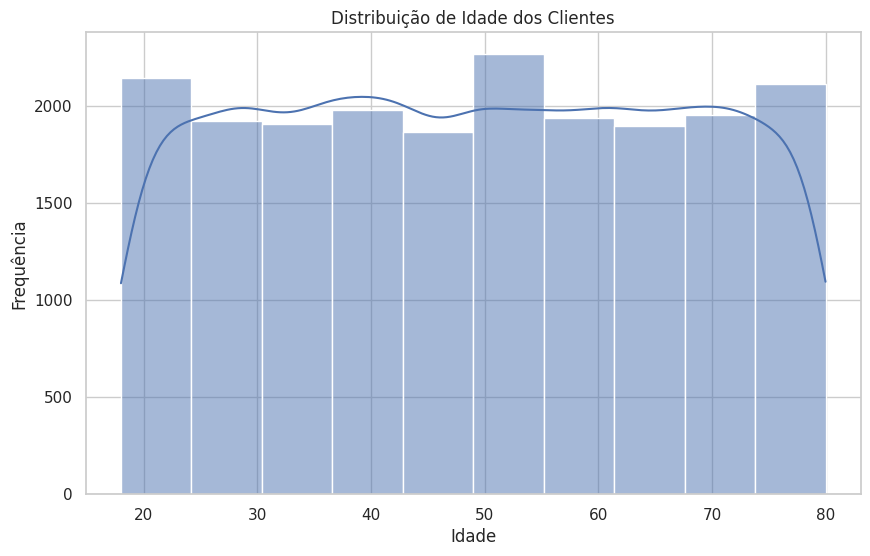

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(df['Idade'], bins=10, kde=True)
plt.title('Distribuição de Idade dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

/tmp/ipykernel_16698/3844065003.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gênero', data=df, palette='Set2')


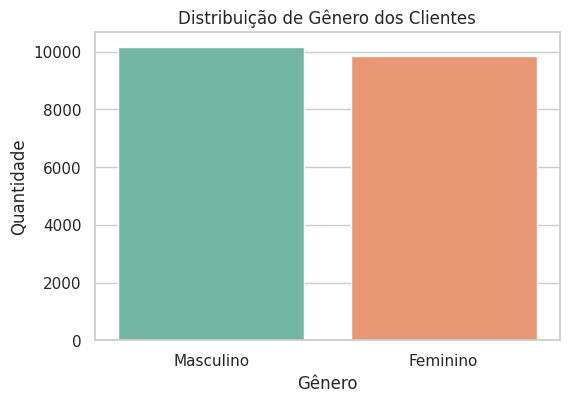

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gênero', data=df, palette='Set2')
plt.title('Distribuição de Gênero dos Clientes')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.show()

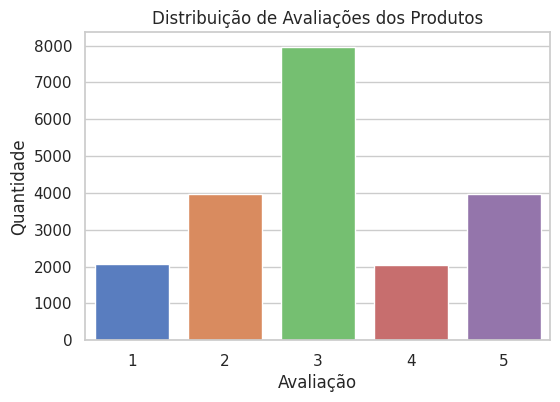

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(x='Avaliação', hue='Avaliação', data=df, palette='muted', legend=False)
plt.title('Distribuição de Avaliações dos Produtos')
plt.xlabel('Avaliação')
plt.ylabel('Quantidade')
plt.show()

/tmp/ipykernel_16698/1195659100.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Tipo Entrega', data=df, palette='Set1', legend=False)


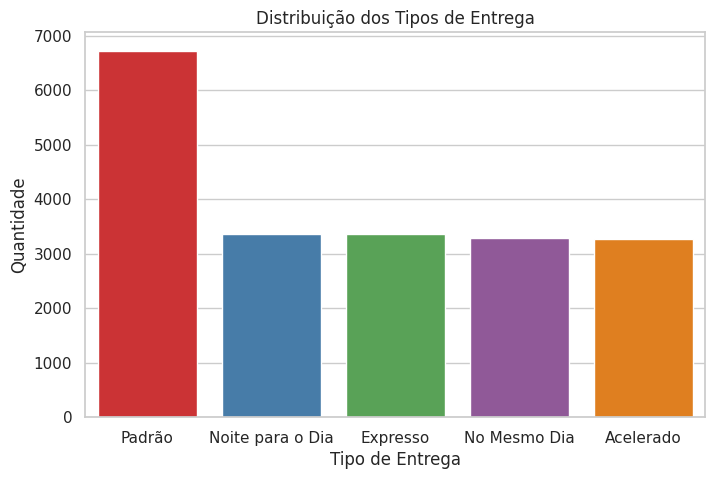

In [33]:
plt.figure(figsize=(8,5))
sns.countplot(x='Tipo Entrega', data=df, palette='Set1', legend=False)
plt.title('Distribuição dos Tipos de Entrega')
plt.xlabel('Tipo de Entrega')
plt.ylabel('Quantidade')
plt.show()

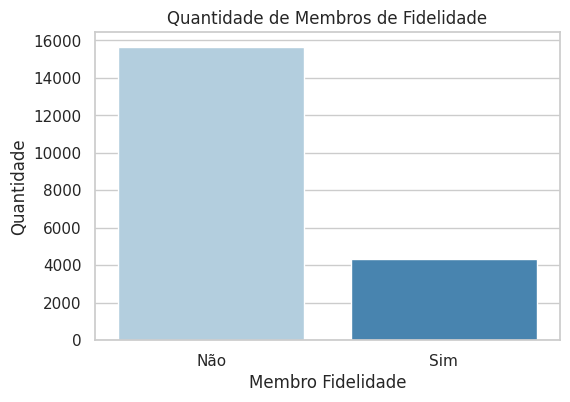

In [34]:
plt.figure(figsize=(6,4))
sns.countplot(x='Membro Fidelidade', hue='Membro Fidelidade', data=df, palette='Blues', legend=False)
plt.title('Quantidade de Membros de Fidelidade')
plt.xlabel('Membro Fidelidade')
plt.ylabel('Quantidade')
plt.show()

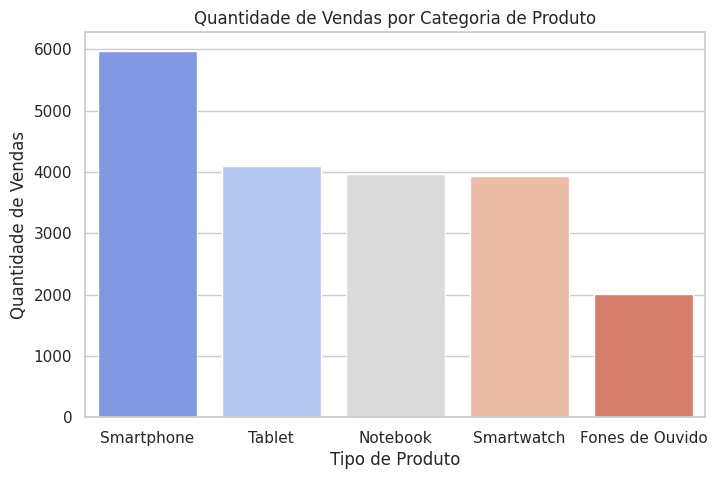

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(x='Tipo Produto', hue='Tipo Produto', data=df, palette='coolwarm', legend=False)
plt.title('Quantidade de Vendas por Categoria de Produto')
plt.xlabel('Tipo de Produto')
plt.ylabel('Quantidade de Vendas')
plt.show()

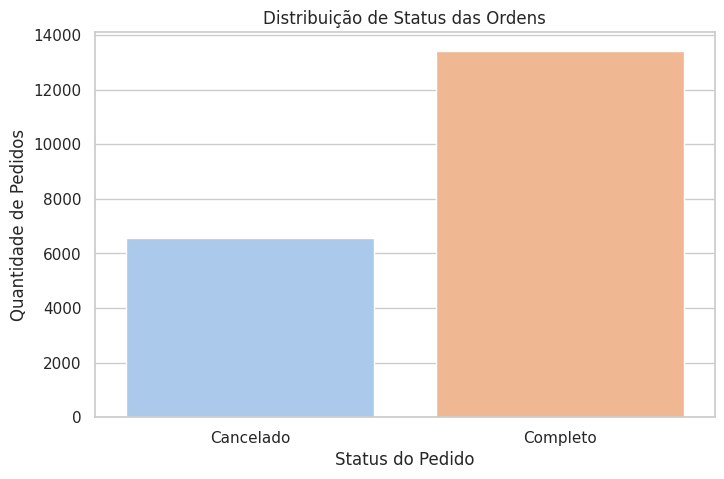

In [36]:
plt.figure(figsize=(8,5))
sns.countplot(x='Status Pedido', hue='Status Pedido', data=df, palette='pastel', legend=False)
plt.title('Distribuição de Status das Ordens')
plt.xlabel('Status do Pedido')
plt.ylabel('Quantidade de Pedidos')
plt.show()

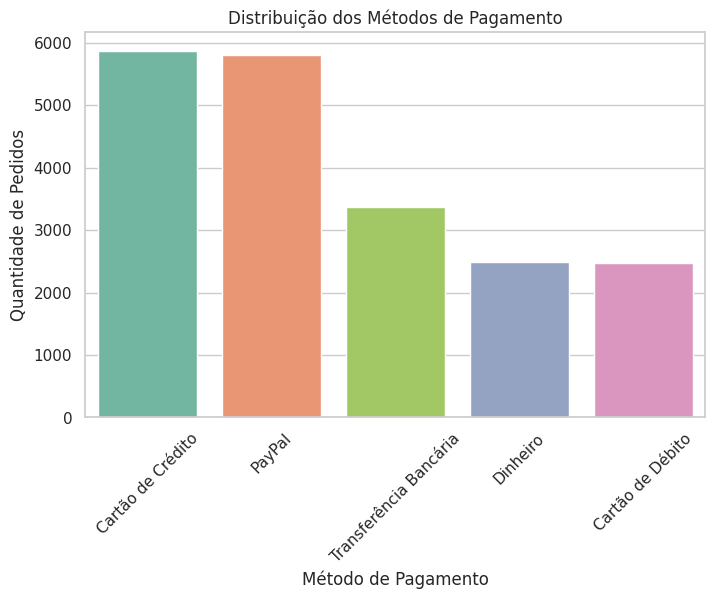

In [37]:
plt.figure(figsize=(8,5))
sns.countplot(x='Método Pagamento', hue='Método Pagamento', order=df['Método Pagamento'].value_counts().index, data=df, palette='Set2', legend=False)
plt.title('Distribuição dos Métodos de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Quantidade de Pedidos')
plt.xticks(rotation=45)
plt.show()

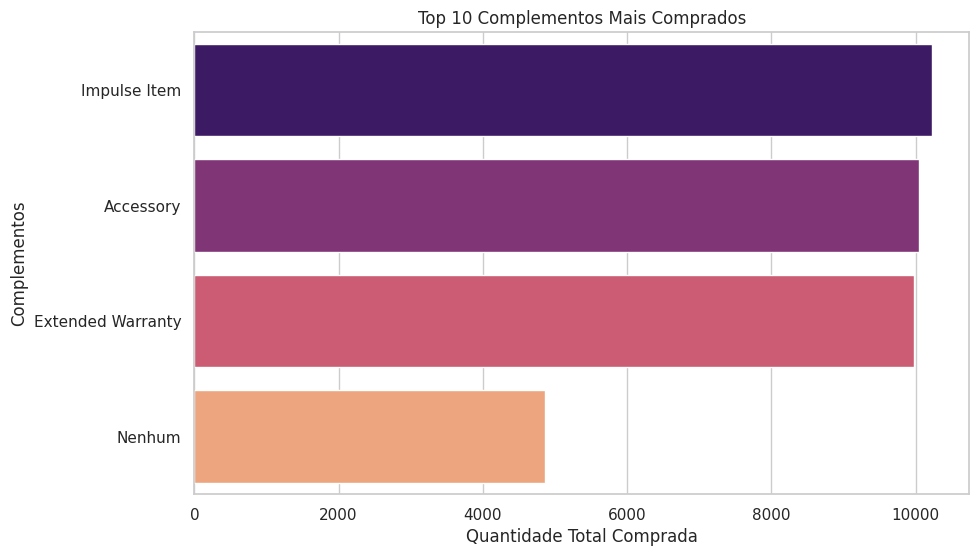

In [38]:
all_complementos = df['Complementos Comprados'].str.split(',')

flat_list = [item.strip() for sublist in all_complementos for item in sublist]
complemento_counts = Counter(flat_list)

top_complementos = pd.DataFrame(complemento_counts.items(), columns=['Complemento', 'Quantidade'])
top_complementos = top_complementos.sort_values(by='Quantidade', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Quantidade', y='Complemento', hue='Complemento', data=top_complementos, palette='magma', legend=False)
plt.title('Top 10 Complementos Mais Comprados')
plt.xlabel('Quantidade Total Comprada')
plt.ylabel('Complementos')
plt.show()

/tmp/ipykernel_16698/612171689.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Preço Unitário', data=df, palette='coolwarm', hue=None)


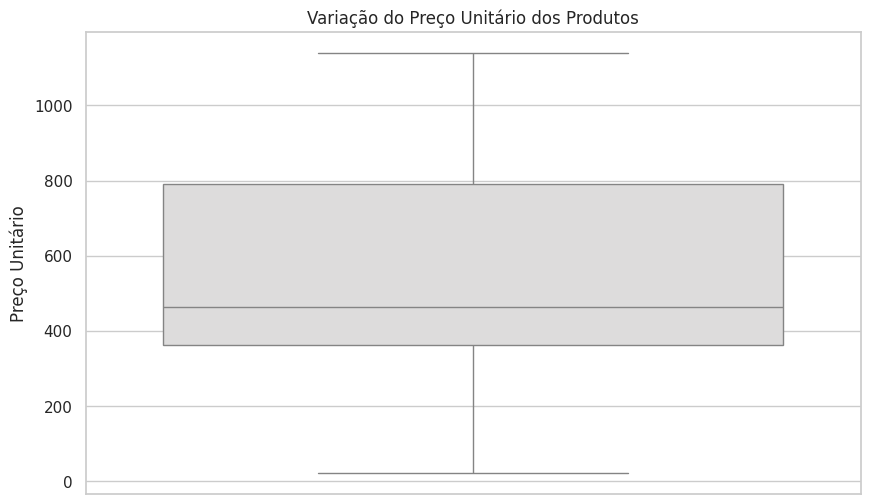

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='Preço Unitário', data=df, palette='coolwarm', hue=None)
plt.title('Variação do Preço Unitário dos Produtos')
plt.ylabel('Preço Unitário')
plt.show()

/tmp/ipykernel_16698/4060396957.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Preço Total', data=df, palette='viridis', hue=None)


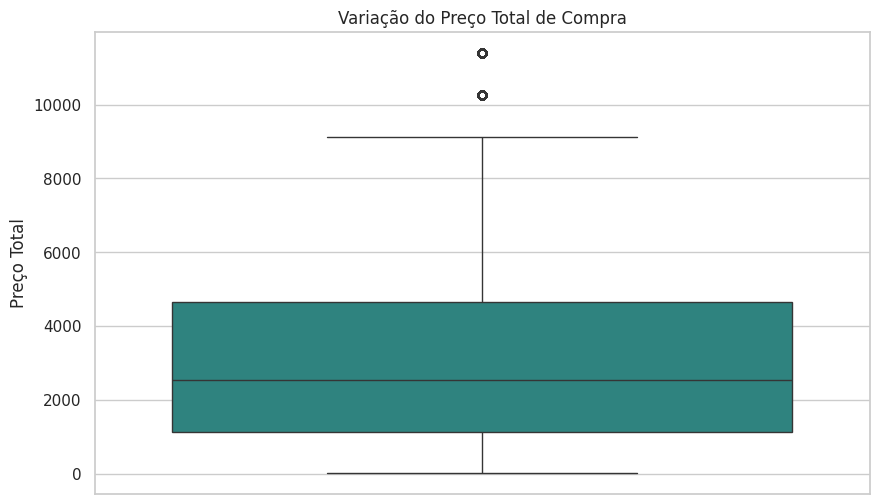

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='Preço Total', data=df, palette='viridis', hue=None)
plt.title('Variação do Preço Total de Compra')
plt.ylabel('Preço Total')
plt.show()

/tmp/ipykernel_16698/1021266205.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Membro Fidelidade', y='Preço Total', data=df, hue=None, palette='Set1')


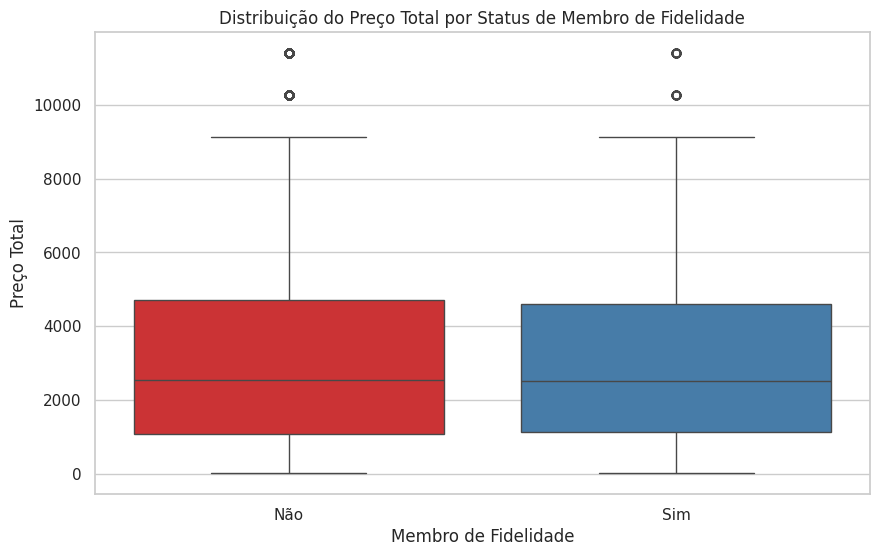

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Membro Fidelidade', y='Preço Total', data=df, hue=None, palette='Set1')
plt.title('Distribuição do Preço Total por Status de Membro de Fidelidade')
plt.xlabel('Membro de Fidelidade')
plt.ylabel('Preço Total')
plt.show()

/tmp/ipykernel_16698/2737198965.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tipo Produto', y='Preço Total', data=df, hue=None, palette='Set2')


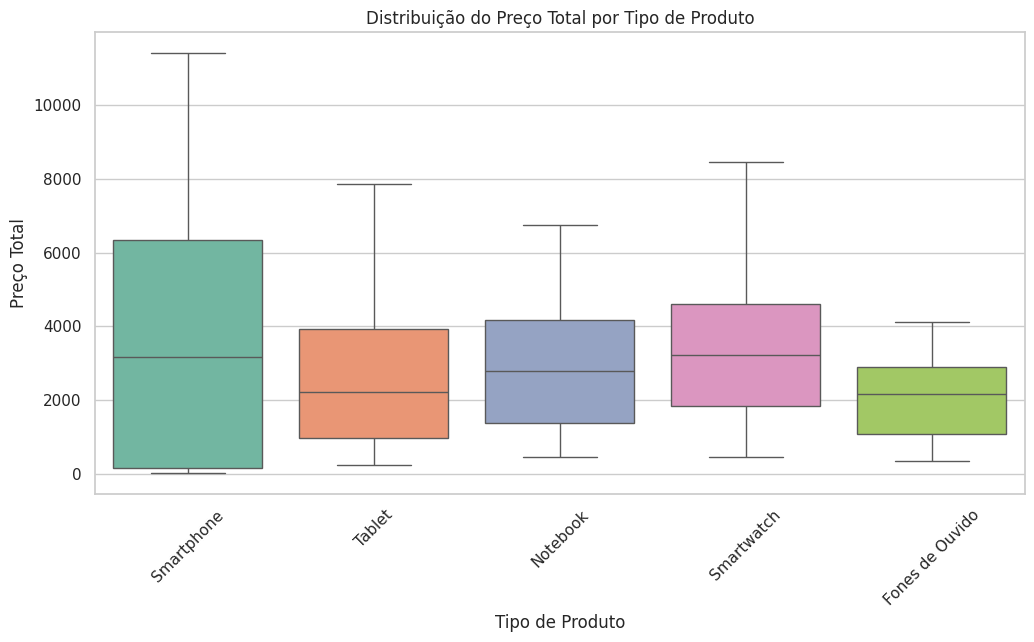

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Tipo Produto', y='Preço Total', data=df, hue=None, palette='Set2')
plt.title('Distribuição do Preço Total por Tipo de Produto')
plt.xlabel('Tipo de Produto')
plt.ylabel('Preço Total')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_16698/859728605.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Avaliação', y='Preço Total', data=df, hue=None, palette='Set3')


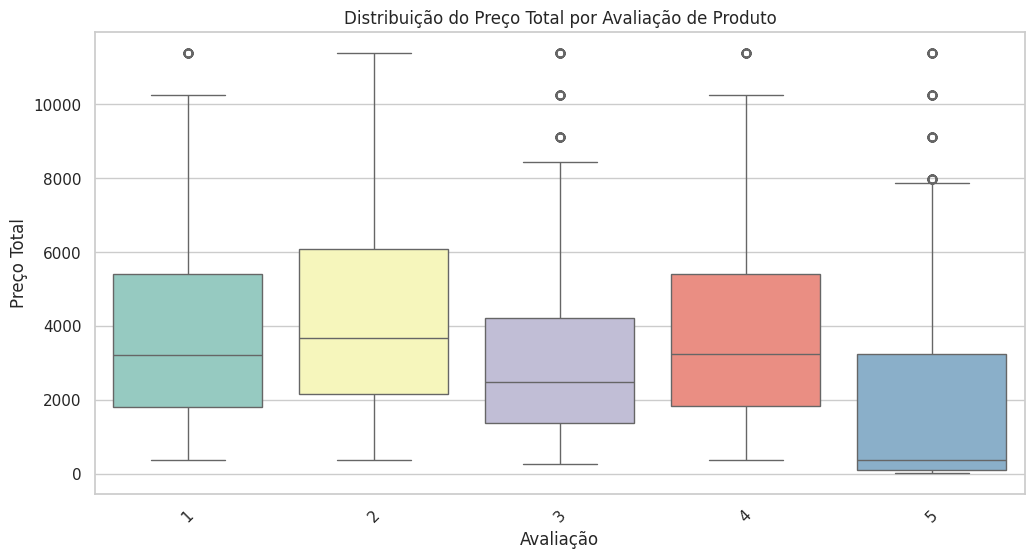

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Avaliação', y='Preço Total', data=df, hue=None, palette='Set3')
plt.title('Distribuição do Preço Total por Avaliação de Produto')
plt.xlabel('Avaliação')
plt.ylabel('Preço Total')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_16698/3609047795.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Método Pagamento', y='Preço Total', data=df, palette='Set2')


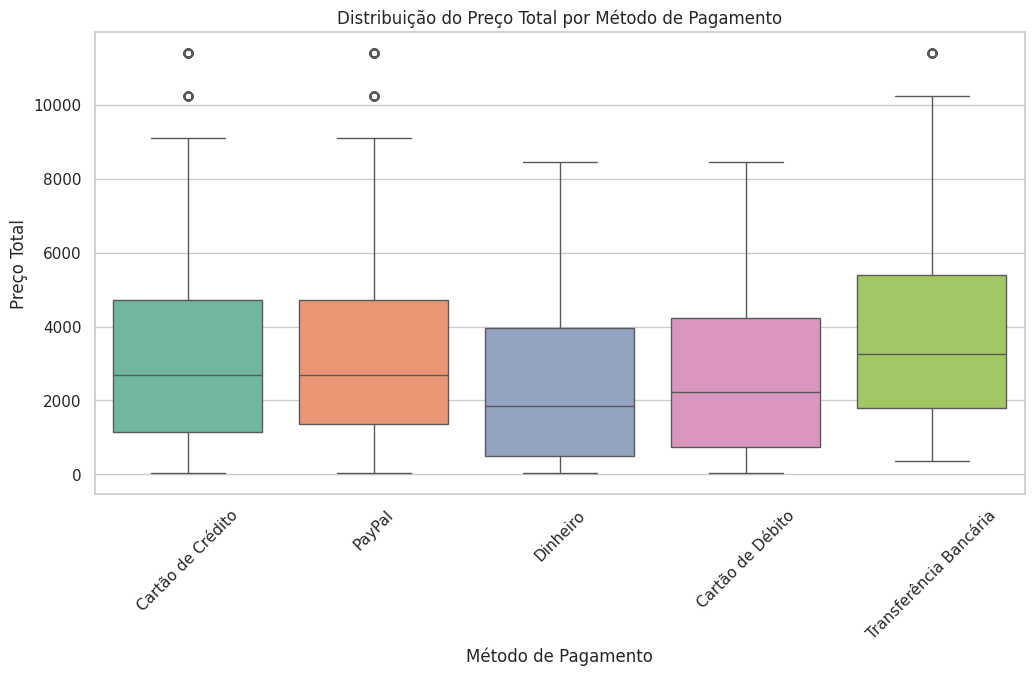

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Método Pagamento', y='Preço Total', data=df, palette='Set2')
plt.title('Distribuição do Preço Total por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Preço Total')
plt.xticks(rotation=45)
plt.show()

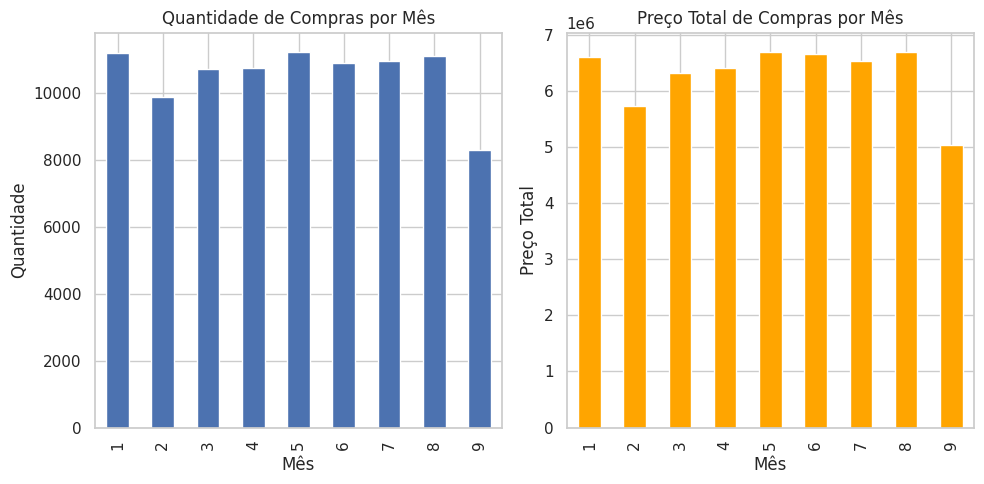

In [45]:
df_2024 = df[df['Data Compra'].dt.year == 2024]

sazonalidade = df_2024.groupby(df_2024['Mês']).agg({'Quantidade': 'sum', 'Preço Total': 'sum'})

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
sazonalidade['Quantidade'].plot(kind='bar')
plt.title('Quantidade de Compras por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade')

plt.subplot(1, 2, 2)
sazonalidade['Preço Total'].plot(kind='bar', color='orange')
plt.title('Preço Total de Compras por Mês')
plt.xlabel('Mês')
plt.ylabel('Preço Total')

plt.tight_layout()
plt.show()

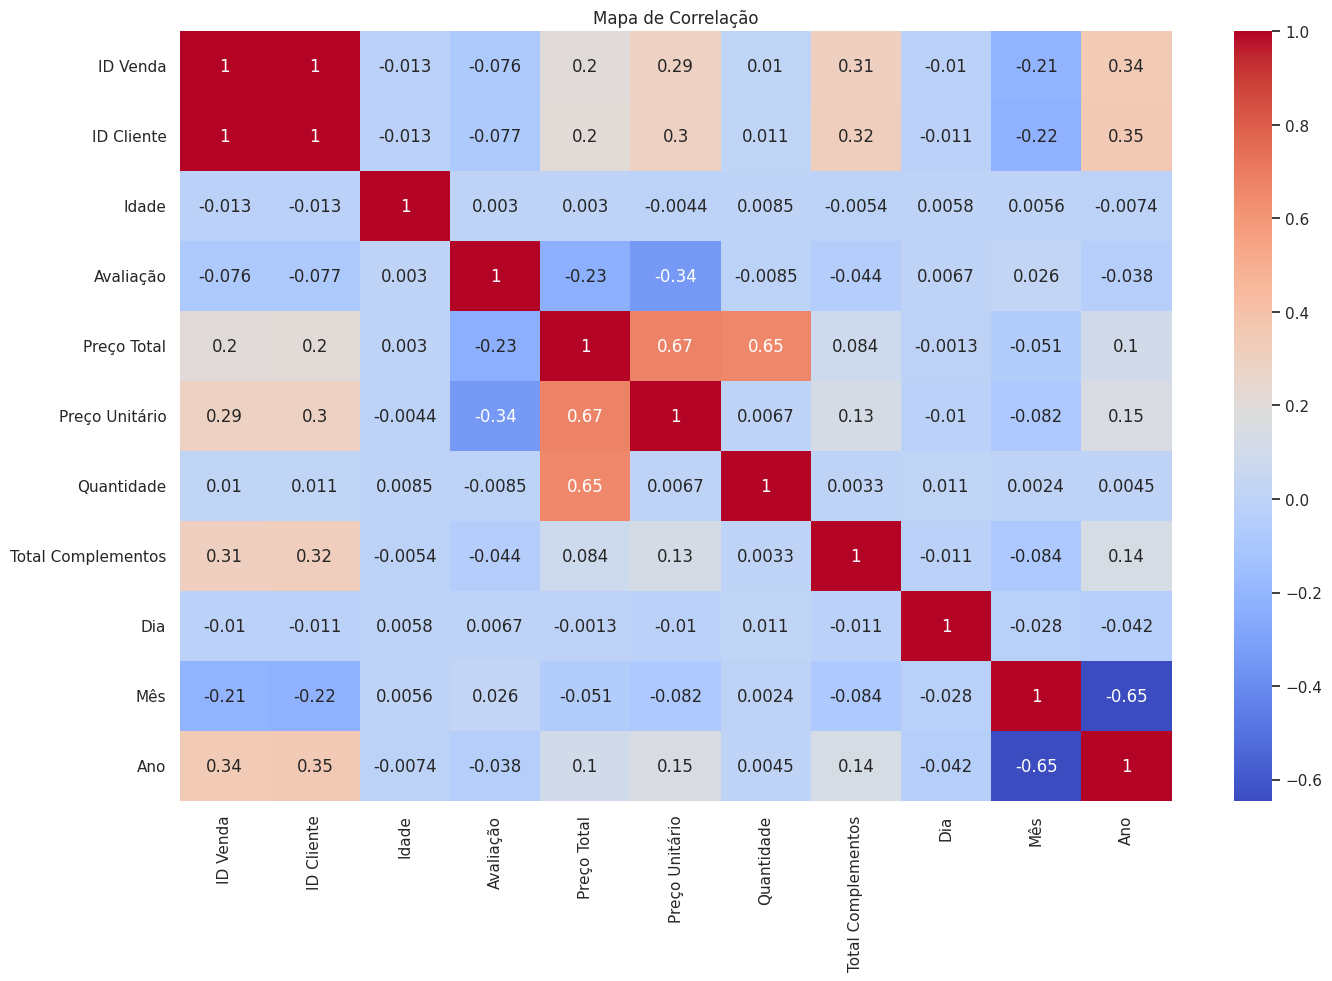

In [46]:
# Selecionar apenas colunas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Calculando a correlação
corr = df_numeric.corr()

# Criando o heatmap com Seaborn
plt.figure(figsize=(16, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True)
plt.title('Mapa de Correlação')
plt.show()


In [47]:
import ace_tools as tools

# Selecionar apenas colunas numéricas
df_numerico = df.select_dtypes(include=[np.number])

def detectar_outliers_numericos(df):
    outliers = {}
    for coluna in df.columns:
        # Verificando se a coluna é numérica
        if df[coluna].dtype in [np.float64, np.int64]:
            # Calculando os limites usando o IQR (Interquartile Range)
            Q1 = df[coluna].quantile(0.25)
            Q3 = df[coluna].quantile(0.75)
            IQR = Q3 - Q1
            limite_inferior = Q1 - 1.5 * IQR
            limite_superior = Q3 + 1.5 * IQR

            # Detectando outliers
            outliers[coluna] = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)][coluna]
    
    return outliers

# Detectando os outliers apenas nas colunas numéricas
outliers_numericos_detectados = detectar_outliers_numericos(df_numerico)

# Exibir o resultado para o usuário
tools.display_dataframe_to_user(name="Outliers Detectados - Colunas Numéricas", dataframe=pd.DataFrame(outliers_numericos_detectados))

ModuleNotFoundError: No module named 'ace_tools'